In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Background - Decision Trees

Decision trees are models which are trained using machine learning techniques and are used for classification or regression tasks. Classification, which is the focus of this ALS, refers to labelling an input as a member of a particular class, for example labelling an image as containing a dog vs. a cat. 

Decision trees have an intuitive flowchart-like structure where each node represents a feature, each branch represents a decision, and each leaf node represents an outcome or prediction. This is illustrated in the figure below which shows a decision tree that was trained to identify whether a point $(x_1,x_2)$ is part of the red class or the blue class \[1\].  

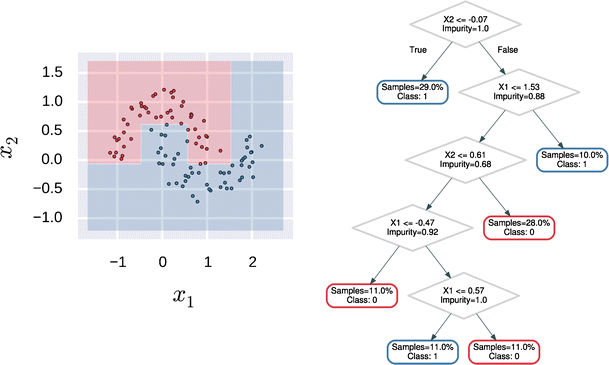

Make sure you understand how the decision tree, trace through the decision tree to see what it classifies the point $(0,1)$. Don't cheat by looking at the plotted data :)

The process of training a decision tree is an interesting topic that is not relevant for this ALS. If you are interested in learning more (after you have completed all the exercises), Normalized Nerd has a great video on [decision tree training](https://youtu.be/ZVR2Way4nwQ).

\[1\] Fratello, M., et al. (2017). Multi-View Ensemble Classification of Brain Connectivity Images for Neurodegeneration Type Discrimination. *Neuroinformatics*. 15(2)

# Exercise \#1 - Function Definition

The performance of a decision tree is measured by the accuracy of its predictions using a test data set. Accuracy is defined as:
<p style="text-align: center;">
$\text{accuracy} = \frac{\text{# of correctly classified instances}}{\text{total number of instances tested}}$
    </p>

The code below calls a function to calculate the accuracy of a decision tree given the true and predicted labels when provided the test data set. 

**Write the function definition so that the code will work**


In [1]:
# Soln. Delete before posting
def calculate_accuracy(y_true, y_pred):
    num_correct = 0
    for i in range(0,len(y_true)):
        if y_true[i] == y_pred[i]:
            num_correct = num_correct + 1
     
    return num_correct / len(y_true)

In [2]:
# Test the function
y_true = [0, 1, 2, 1, 0]
y_pred = [0, 2, 1, 1, 0]
accuracy = calculate_accuracy(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6


# Exercise \#2 - Function Invocation

The function `generate_data` defined below generates `N` data points with `num_classes` labels and plots the data. In a new code cell call this function to generate $1000$ data points from two classes. Write the code so that you are able to use the data generated later for training a decision tree model. Also, look carefully at the function definition and make your code as human-readable as possible. 

(Hint: Don't be concerned with how the function works, which is beyond the scope of this exercise.)


In [9]:
def generate_data(N, initial_state=3, std=2.5, num_classes=3, marker_size=25):
    
    X, y = make_blobs(n_samples=N, centers=num_classes,
                  random_state=initial_state, cluster_std=std)

    plt.scatter(X[:, 0], X[:, 1], c=y, s=marker_size, cmap='brg')
    plt.colorbar()
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.show()
    
    return X, y

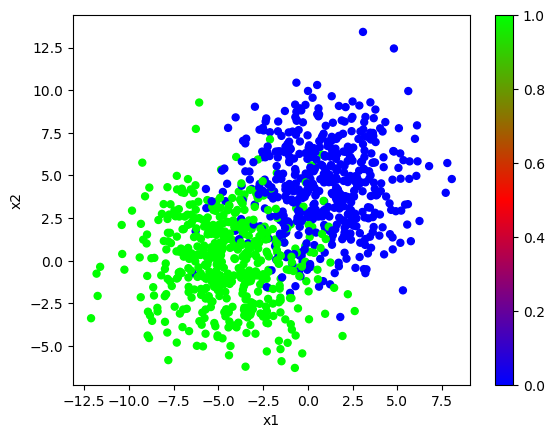

In [10]:
X, y = generate_data(1000, num_classes=2)

# Train the model

Run the code in the cell below, which will train a decision tree to classify new data points into either the blue or green class. If you saved the training set with names other than `X` for the data and `y` for the labels, you will have to modify the code accordingly


[Text(0.5, 0.8333333333333334, 'x[0] <= -1.494\ngini = 0.5\nsamples = 1000\nvalue = [500, 500]\nclass = y[0]'),
 Text(0.25, 0.5, 'x[1] <= 3.988\ngini = 0.257\nsamples = 521\nvalue = [79, 442]\nclass = y[1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.128\nsamples = 450\nvalue = [31, 419]\nclass = y[1]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.438\nsamples = 71\nvalue = [48, 23]\nclass = y[0]'),
 Text(0.75, 0.5, 'x[1] <= -0.043\ngini = 0.213\nsamples = 479\nvalue = [421, 58]\nclass = y[0]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.478\nsamples = 53\nvalue = [21, 32]\nclass = y[1]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.115\nsamples = 426\nvalue = [400, 26]\nclass = y[0]')]

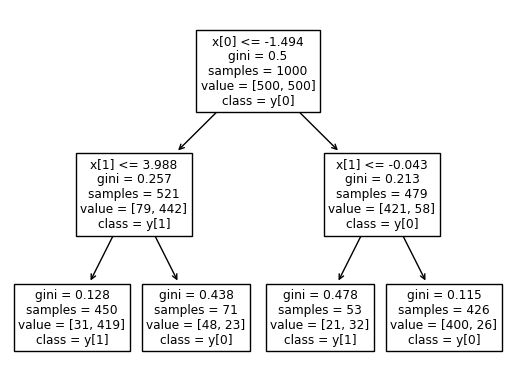

In [14]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=2, random_state = 42)

# Fit the classifier to the training data
clf.fit(X, y)

tree.plot_tree(clf,class_names = True)

**Interpreting the decision tree:** The first line in a node is the splitting condition. If the condition is `True` then the tree branches to the left. Otherwise, it branches to the right. The last line in a node is the predicted label for a given input. 

# Exercise \#3 - Function Definition \& Invocation

Write a function to implement the trained decision tree and test it multiple times. The function should take a data point and label it as either blue or green. The requirements for this exercise are intentionally vague and you may need to consider several potential solutions and select an appropriate one. 

In [22]:
def my_decision_tree(x):
    if x[0] <= -1.494:
        if x[1] <= 3.988:
            return 1, "green"
        else:
            return 0, "blue"
    elif x[1] <= -0.043:
        return 1, "green"
    else:
        return 0, "blue"

In [23]:
_, label_txt = my_decision_tree([2.5,0])
print(label_txt)

blue


# Discussion

Prepare to discuss your solution for **Exercise \#3** to the rest of the class.

# (Bonus) Exercise \#4 - Model Accuracy

Using the `calculate_accuracy` function from Exercise \#1 and the decision tree model from Exercise \#3, test the accuracy of the model with the test data set given below. 

In [29]:
x_test = [[2.5,0],[-5,0]]
y_true = [0,1]
y_pred = []

for x in x_test:
    label_idx, _ = my_decision_tree(x)
    y_pred += [label_idx]
    
accuracy = calculate_accuracy(y_true, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# Advanced Exercises

decision trees are prone to overfitting, especially when the tree becomes too deep and complex. Overfitting occurs when the tree captures noise and irrelevant patterns in the training data, leading to poor generalization on unseen data. To mitigate overfitting, techniques such as pruning, limiting tree depth, or using ensemble methods like random forests or gradient boosting can be applied.